In [1]:
from pyscenic.rss import regulon_specificity_scores

In [2]:
from pyscenic.plotting import plot_rss
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyscenic.binarization import binarize
import scanpy as sc
from adjustText import adjust_text

In [3]:
auc_mtx = pd.read_csv("/mnt/lugli/spuccio/Esofago/pyscenic/output_pyscenic2/auc_mtx_noimputed.csv",header=0,sep=",",index_col=0)

In [8]:
metadata = pd.read_csv("//mnt/lugli/spuccio/Esofago/pyscenic/pyscenic_output/metadati_scenic.csv",header=0,sep=",",index_col=0)

In [35]:
tmp1 = pd.merge(auc_mtx,metadata,left_index=True, right_index=True)

In [36]:
tmp1

,ACAA1(-),AHCTF1(+),AHCTF1(-),AHR(+),AHR(-),AHRR(+),AKR1A1(+),APEX1(-),ARG2(+),ARID3A(+),...,ZSCAN31(+),ZSCAN32(+),ZSCAN5A(+),ZSCAN9(+),ZXDA(+),ZXDC(+),ZXDC(-),cluster,identity,status
AAACCTGAGCTAACTC-2,0.372652,0.042907,0.925295,0.075115,0.484600,0.000000,0.0,0.0,0.048214,0.018272,...,0.091219,0.0,0.0,0.0,0.000000,0.028790,0.084797,6,NAIVE T CELLS,NT
AAAGATGAGACAGAGA-2,0.613718,0.027233,0.929227,0.073272,0.603997,0.034638,0.0,0.0,0.067988,0.059932,...,0.090760,0.0,0.0,0.0,0.000000,0.000000,0.086239,2,TEM,NT
AAAGATGGTGTATGGG-2,0.553517,0.021829,0.824377,0.054165,0.523460,0.000000,0.0,0.0,0.050295,0.031709,...,0.099869,0.0,0.0,0.0,0.438619,0.000000,0.093054,4,MAIT,NT
AAAGCAAAGCTGCCCA-2,0.540935,0.054369,0.778506,0.069831,0.568283,0.000000,0.0,0.0,0.094348,0.033631,...,0.114679,0.0,0.0,0.0,0.000000,0.026649,0.133945,7,TRM CD69+ INFg+,NT
AAAGCAAAGCTGTTCA-2,0.534469,0.019305,0.874181,0.064875,0.538860,0.000000,0.0,0.0,0.072608,0.051928,...,0.068021,0.0,0.0,0.0,0.000000,0.017824,0.161337,4,MAIT,NT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCAGGACATTA-9,0.544168,0.038190,0.862385,0.046957,0.523132,0.000000,0.0,0.0,0.068431,0.030704,...,0.093644,0.0,0.0,0.0,0.000000,0.000000,0.080472,9,EXHAUSTED T CELLS,T
TTTCCTCTCCTCGCAT-9,0.559983,0.032486,0.857143,0.075831,0.603014,0.000000,0.0,0.0,0.038565,0.010549,...,0.030210,0.0,0.0,0.0,0.000000,0.037920,0.116383,10,γδ T CELLS,T
TTTGCGCCAAGGACTG-9,0.597728,0.031917,0.903014,0.059817,0.549934,0.000000,0.0,0.0,0.055947,0.029152,...,0.113565,0.0,0.0,0.0,0.000000,0.000000,0.086763,9,EXHAUSTED T CELLS,T
TTTGGTTAGGAGTACC-9,0.538226,0.028425,0.707733,0.067026,0.492857,0.000000,0.0,0.0,0.070708,0.029966,...,0.049410,0.0,0.0,0.0,0.000000,0.000000,0.075360,9,EXHAUSTED T CELLS,T


In [37]:
cluster = tmp1

In [38]:
cluster = cluster.set_index('identity')

In [41]:
cluster = cluster.loc[cluster['status'] == "T"]

In [42]:
del cluster['cluster']
del cluster['status']

In [43]:
cluster

,ACAA1(-),AHCTF1(+),AHCTF1(-),AHR(+),AHR(-),AHRR(+),AKR1A1(+),APEX1(-),ARG2(+),ARID3A(+),...,ZSCAN25(+),ZSCAN26(+),ZSCAN29(+),ZSCAN31(+),ZSCAN32(+),ZSCAN5A(+),ZSCAN9(+),ZXDA(+),ZXDC(+),ZXDC(-)
identity,,,,,,,,,,,,,,,,,,,,,
TRM CD69+ INFg+,0.579118,0.038577,0.871560,0.044295,0.511533,0.0,0.000000,0.0,0.081782,0.039471,...,0.085976,0.000000,0.023453,0.178244,0.0,0.0,0.0,0.000000,0.000000,0.077982
MAIT,0.524596,0.024698,0.783748,0.083695,0.590433,0.0,0.000000,0.0,0.050393,0.023120,...,0.061468,0.091219,0.014003,0.139318,0.0,0.0,0.0,0.000000,0.000000,0.085714
TRM CD69+ INFg+,0.595194,0.031562,0.880734,0.063872,0.609895,0.0,0.015436,0.0,0.086484,0.035196,...,0.075885,0.164613,0.010623,0.116776,0.0,0.0,0.0,0.000000,0.015203,0.084666
γδ T CELLS,0.625688,0.046570,0.933159,0.049066,0.614548,0.0,0.000000,0.0,0.056471,0.028528,...,0.085321,0.000000,0.009381,0.075033,0.0,0.0,0.0,0.225863,0.063172,0.094495
MAIT,0.606903,0.040436,0.880734,0.055599,0.637353,0.0,0.000000,0.0,0.052900,0.030933,...,0.068545,0.000000,0.036904,0.052425,0.0,0.0,0.0,0.283093,0.013630,0.096199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXHAUSTED T CELLS,0.544168,0.038190,0.862385,0.046957,0.523132,0.0,0.000000,0.0,0.068431,0.030704,...,0.063172,0.000000,0.000000,0.093644,0.0,0.0,0.0,0.000000,0.000000,0.080472
γδ T CELLS,0.559983,0.032486,0.857143,0.075831,0.603014,0.0,0.000000,0.0,0.038565,0.010549,...,0.084010,0.000000,0.031800,0.030210,0.0,0.0,0.0,0.000000,0.037920,0.116383
EXHAUSTED T CELLS,0.597728,0.031917,0.903014,0.059817,0.549934,0.0,0.000000,0.0,0.055947,0.029152,...,0.045347,0.000000,0.037732,0.113565,0.0,0.0,0.0,0.000000,0.000000,0.086763


In [44]:
rss_cellType_tmp1 = regulon_specificity_scores( cluster, cluster.index)

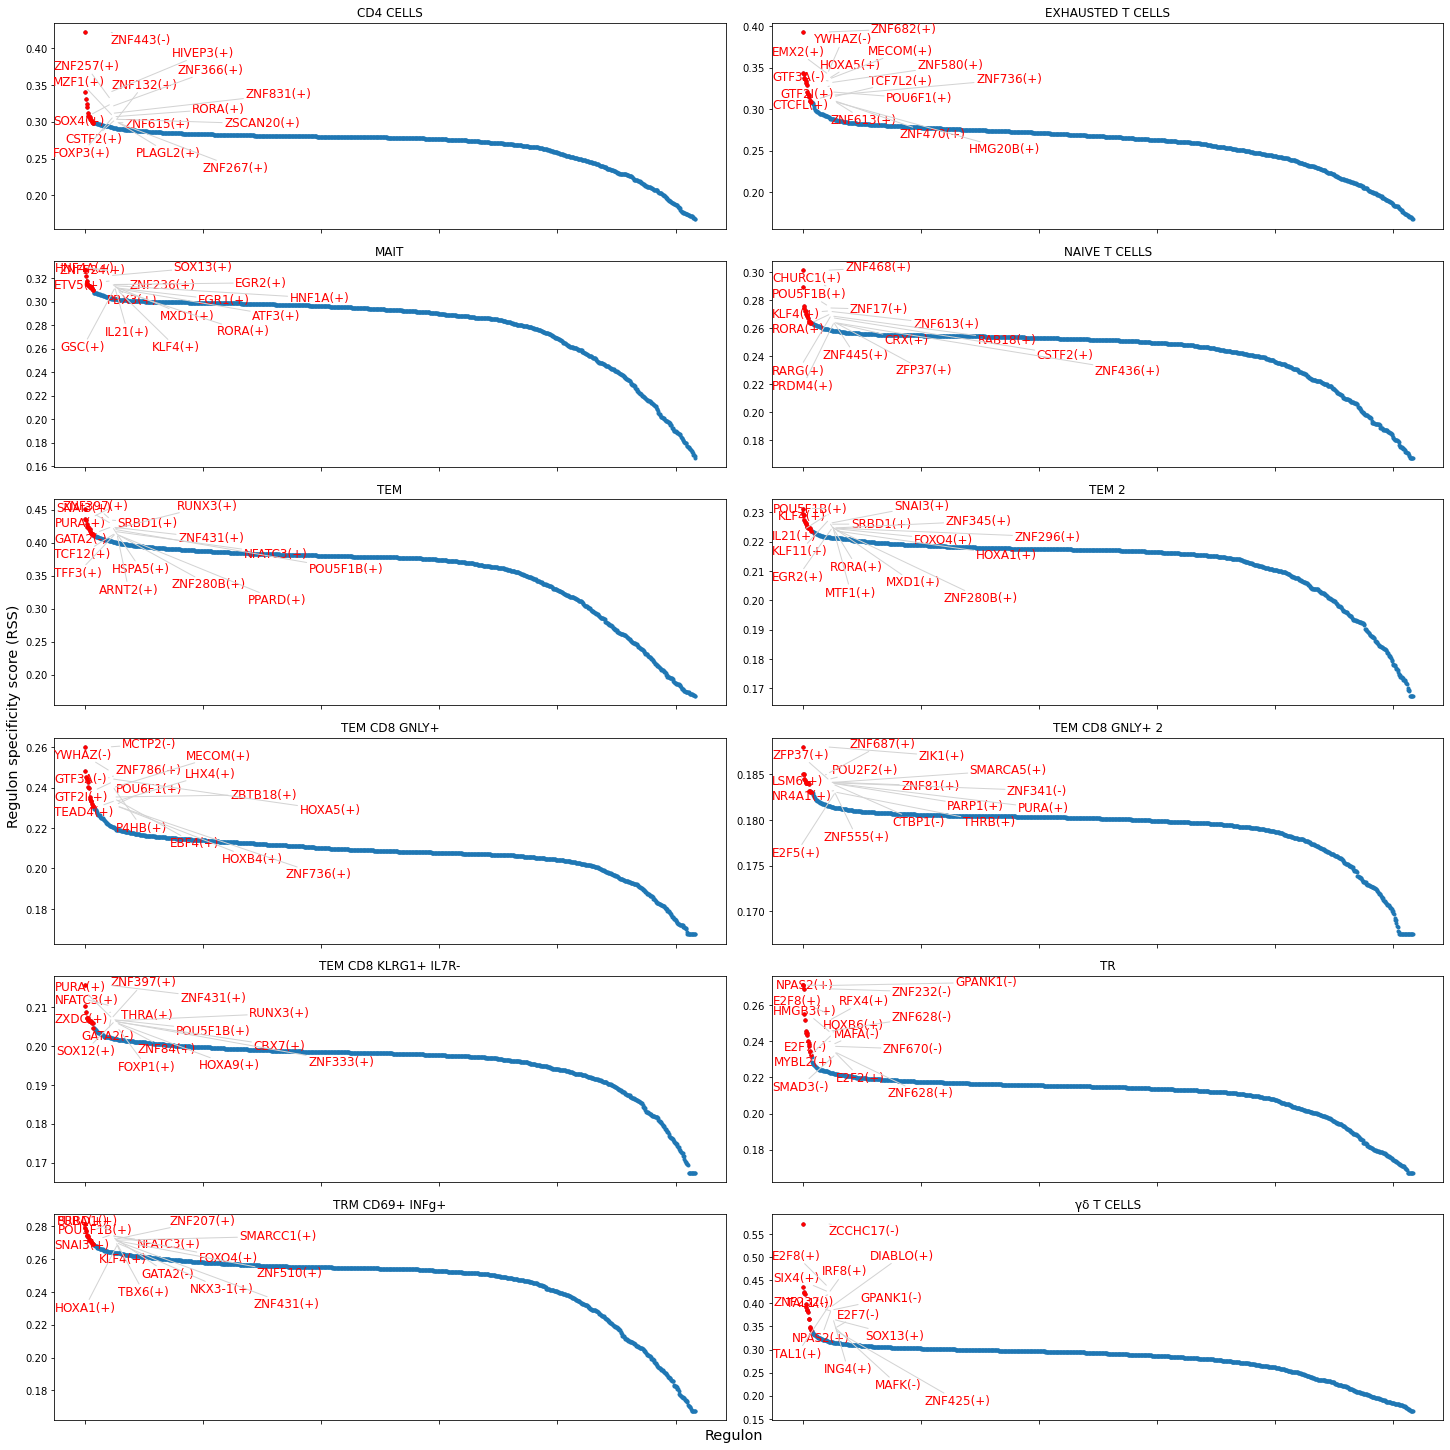

In [45]:
from adjustText import adjust_text
cats = sorted(list(set(cluster.index)))
fig = plt.figure(figsize=(20, 20))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1.T[c]
    ax = fig.add_subplot(6,2,num)
    plot_rss(rss_cellType_tmp1, c, top_n=15, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/mnt/lugli/spuccio/Esofago/pyscenic/output_pyscenic2/regulon_imputed1.pdf", dpi=600, bbox_inches = "tight")
plt.show()


### Select TOP 10 

In [66]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType_tmp1.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

### Z-SCORE computation

In [67]:
auc_mtx_Z = pd.DataFrame( index=cluster.index )
for col in list(cluster.columns):
    auc_mtx_Z[ col ] = ( cluster[col] - cluster[col].mean()) / cluster[col].std(ddof=0)

In [68]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [69]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cluster.index ]

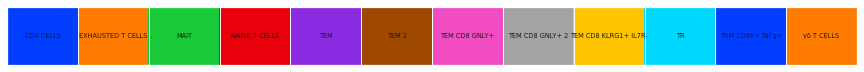

In [70]:
import numpy as np
import matplotlib as mpl
sns.set()
sns.set(font_scale=0.55)
fig = palplot( colors, cats, size=1.0)
plt.savefig("/mnt/lugli/spuccio/Esofago/pyscenic/output_pyscenic2/regulon_scale_imputed.pdf", dpi=600, bbox_inches = "tight")

In [71]:
auc_mtx_Z[topreg]

,PBX3(+),ZNF232(-),ZXDC(+),HIVEP3(+),ZNF257(+),SOX4(+),GPANK1(-),CHURC1(+),GATA2(-),ZNF397(+),...,MCTP2(-),MECOM(+),ZNF687(+),ZNF431(+),ZNF366(+),IRF8(+),ZFP37(+),KLF4(+),SNAI3(+),TAL1(-)
identity,,,,,,,,,,,,,,,,,,,,,
TRM CD69+ INFg+,-0.223562,-0.388781,-1.170322,0.958316,-1.068497,-0.142623,-0.378374,-1.220539,0.833998,0.620068,...,-0.318646,-0.716576,-0.153665,1.390794,-0.537886,-0.329756,-0.345306,-0.062930,0.159203,-0.766452
MAIT,0.538942,0.289357,-1.170322,1.512908,-0.649858,0.453048,0.312840,-0.637709,0.689482,-0.697021,...,-0.318646,-0.716576,-0.153665,-0.141719,0.201749,-0.407516,-0.345306,0.080863,-0.240446,0.619740
TRM CD69+ INFg+,-0.020343,-0.388781,-0.395082,-0.666355,-1.068497,-0.062939,-0.378374,0.582644,1.118465,-0.000824,...,-0.318646,0.256137,-0.153665,-0.413724,-0.317612,1.083795,-0.345306,1.867749,2.316194,-0.766452
γδ T CELLS,0.438202,-0.388781,2.050935,0.577922,-0.440539,-1.194192,-0.378374,-1.247886,-1.219644,0.151326,...,-0.318646,-0.716576,6.132091,-1.070515,0.727173,1.811398,-0.345306,0.435084,-0.422865,1.673047
MAIT,0.082135,2.231546,-0.475279,0.005555,1.787550,0.375977,2.292478,-0.070262,0.651452,-0.377354,...,-0.318646,-0.428770,-0.153665,1.744621,-0.505552,-0.940721,-0.345306,0.389491,0.734307,0.244623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXHAUSTED T CELLS,-1.463717,-0.388781,-1.170322,-0.666355,0.266496,-0.985185,-0.378374,3.216488,0.436960,2.269118,...,-0.318646,-0.079030,-0.153665,0.461998,-1.144144,-1.011538,-0.345306,0.999733,0.040840,-0.766452
γδ T CELLS,-1.498455,3.435919,0.763323,-0.367728,0.092063,-0.554107,3.520074,-1.367528,-1.148147,0.381855,...,-0.318646,-0.716576,-0.153665,-0.829471,0.880758,1.432322,-0.345306,-1.320238,-1.729035,2.532585
EXHAUSTED T CELLS,0.087345,-0.388781,-1.170322,-0.666355,-1.068497,-0.497936,-0.378374,0.565552,0.517585,-0.839949,...,-0.318646,0.948329,-0.153665,-1.070515,1.889168,-0.278380,-0.345306,-0.446961,-0.617815,1.484246


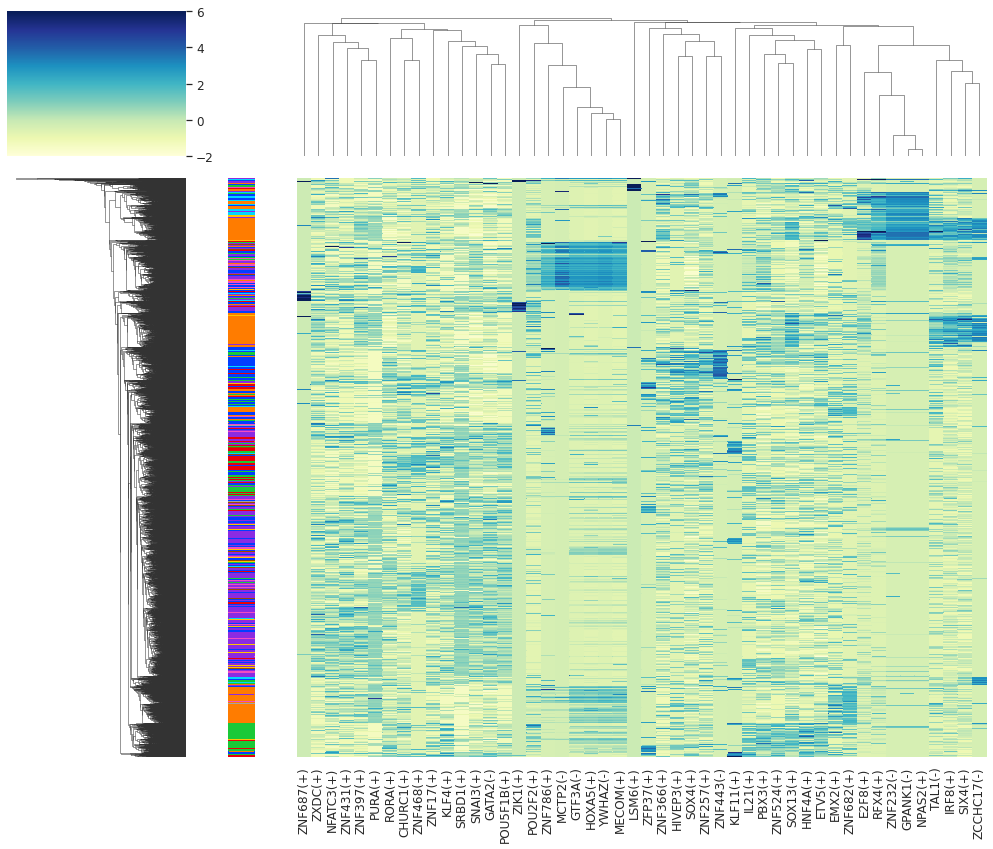

In [72]:
sns.set(font_scale=1.1)
g = sns.clustermap(auc_mtx_Z[topreg],  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(14,12) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("/mnt/lugli/spuccio/Esofago/pyscenic/output_pyscenic2/regulon_cluster_no_normal.pdf", dpi=600, bbox_inches = "tight")